# Data Preprocessing

Data preprocessing steps includes:
1. Digit removal
2. Lemmatization
3. URLS removal
4. Punctuation removal

In [ ]:
!pip install wordcloud
!pip install texthero
!pip install ekphrasis
!pip install tweet-preprocessor

In [ ]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import texthero as hero
import re
from texthero import stopwords
import os 
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob,Word

nltk.download('words')
from nltk.corpus import words

import tensorflow as tf

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
# stopwords=stopwords.words('english')
from pathlib import Path

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Reading dataset

In [ ]:
os.chdir('/content/drive/MyDrive/Master Thesis/')
main_dir='/content/drive/MyDrive/Master Thesis'

raw_data_loc=os.path.join(main_dir,'codalab/RawData')
proc_data_loc= os.path.join(main_dir,'codalab/PreprocessedData')

# feature declaration 
target_col='label'
feature_col='tweet'

#reading data
train_file_n='Constraint_English_Train.csv'
test_file_n='english_test_with_labels.csv'
val_file_n='Constraint_English_Val.csv'

# processed file name
pr_train_name='pr_train.csv'
pr_test_name='pr_test.csv'
pr_val_name='pr_val.csv'



In [ ]:


#reading dataframe
df_train= pd.read_csv(os.path.join(raw_data_loc,train_file_n), header='infer',index_col=[0]).dropna().reset_index(drop=True)
df_test= pd.read_csv(os.path.join(raw_data_loc,test_file_n), header='infer',index_col=[0]).dropna().reset_index(drop=True)
df_val= pd.read_csv(os.path.join(raw_data_loc,val_file_n), header='infer',index_col=[0]).dropna().reset_index(drop=True)


df_train.shape,df_test.shape,df_val.shape


((6420, 2), (2140, 2), (2140, 2))

# Dataset preprocessing

In [ ]:
# function to lemmatize according to part of speech tag
def remove_punctuation(words):
    '''
    Removing punctuation from list of words
    '''
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        new_word = re.sub(r'_|-|ー', '', (word))
        if new_word != '':
            new_words.append(new_word)
    return " ".join(new_words)

def lemma_per_pos(sent):
    '''function to lemmatize according to part of speech tag'''
    tweet_tokenizer=TweetTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_list = [lemmatizer.lemmatize(w) for w in  tweet_tokenizer.tokenize(sent)]
    return remove_punctuation(lemmatized_list)

def df_preprocessing(df,feature_col):
    '''
    Preprocessing of dataframe
    '''
    stop = set(stopwords.words('english'))
    df[feature_col]= (df[feature_col].pipe(hero.lowercase).pipe(hero.remove_urls).pipe(hero.remove_digits) )
    # lemmatization
    df[feature_col]= [lemma_per_pos(sent) for sent in df[feature_col]]
    # df[col_name]= hero.remove_stopwords(df[col_name],custom_stopwords)
    return df


df_train_processed= df_preprocessing(df_train,feature_col)
df_train_processed= df_train_processed.dropna().drop_duplicates().reset_index(drop=True)

df_test_processed= df_preprocessing(df_test,feature_col)
df_test_processed= df_test_processed.dropna().drop_duplicates().reset_index(drop=True)

df_val_processed= df_preprocessing(df_val,feature_col)
df_val_processed= df_val_processed.dropna().drop_duplicates().reset_index(drop=True)

df_train_processed.shape, df_test_processed.shape, df_val_processed.shape

((6219, 2), (2090, 2), (2069, 3))

## Length statistics

Max length: 1452, Min length: 2, Average Length :25
Count of tweet length less than 100 words: tweet    6216
label    6216
len      6216
dtype: int64


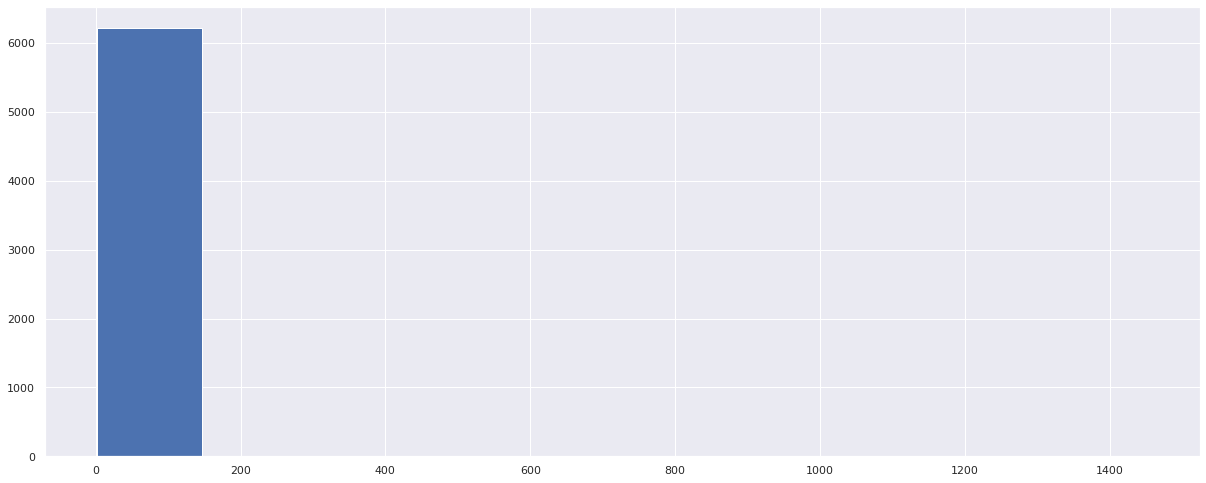

Max length: 97, Min length: 7, Mean Length :25


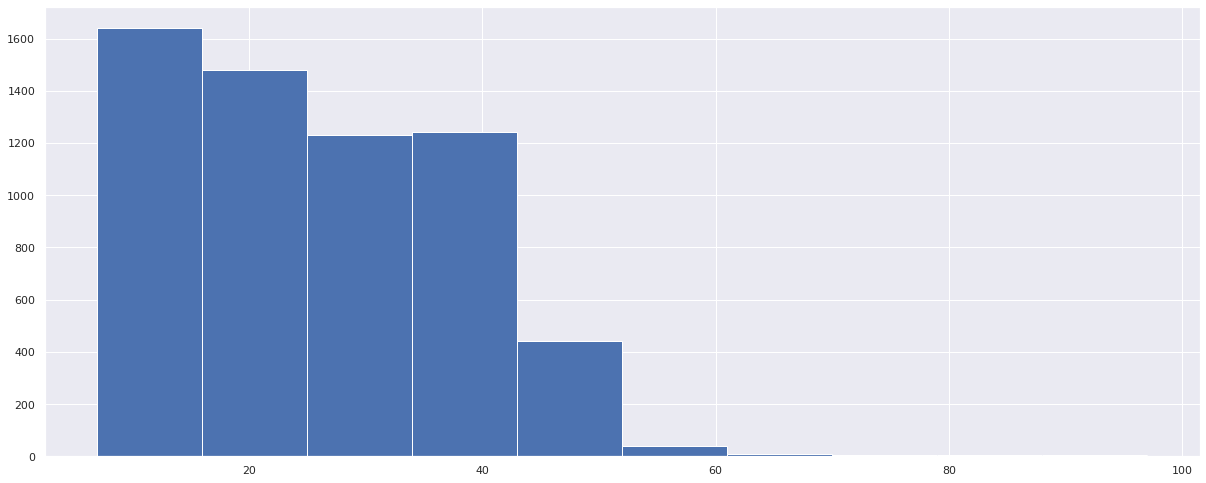

In [ ]:

# sentence length without space means count of words
df_train_processed['len']= df_train_processed[feature_col].str.split().map(lambda x: len(x))
df_train_processed.sort_values('len', ascending=False).reset_index(drop=True)

print('Max length: {}, Min length: {}, Average Length :{}'.format(max(df_train_processed['len']),min(df_train_processed['len']),int(df_train_processed['len'].mean())))
print('Count of tweet length less than 100 words:',df_train_processed[df_train_processed.len<=150].count())

df_train_processed.len.hist()
plt.show()

# After removing 
df_train_processed=df_train_processed[(df_train_processed.len>6) & (df_train_processed.len<=100)].reset_index(drop=True)
print('Max length: {}, Min length: {}, Mean Length :{}'.format(max(df_train_processed['len']),min(df_train_processed['len']),int(df_train_processed['len'].mean())))
 
df_train_processed.len.hist()
plt.show()

Count of tweet length less than 100 words tweet    2086
label    2086
len      2086
dtype: int64
Max length: 86, Min length: 7, Average Length :25


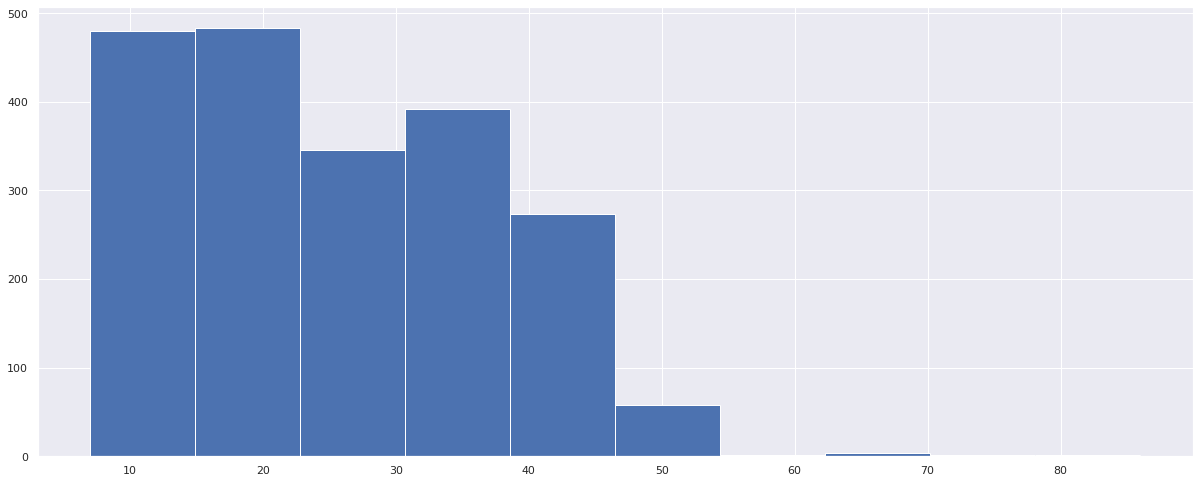

In [ ]:
df_test_processed['len']= df_test_processed['tweet'].str.split().map(lambda x: len(x))
df_test_processed.sort_values('len', ascending=False).reset_index(drop=True)

print('Count of tweet length less than 100 words',df_test_processed[df_test_processed.len<=100].count())

# so same applies to test data 
df_test_processed=df_test_processed[(df_test_processed.len>6) & (df_test_processed.len<=100)].reset_index(drop=True)
print('Max length: {}, Min length: {}, Average Length :{}'.format(max(df_test_processed['len']),min(df_test_processed['len']),int(df_test_processed['len'].mean())))

df_test_processed['len'].hist()
plt.show()

Max length: 85, Min length: 7, Average Length :25


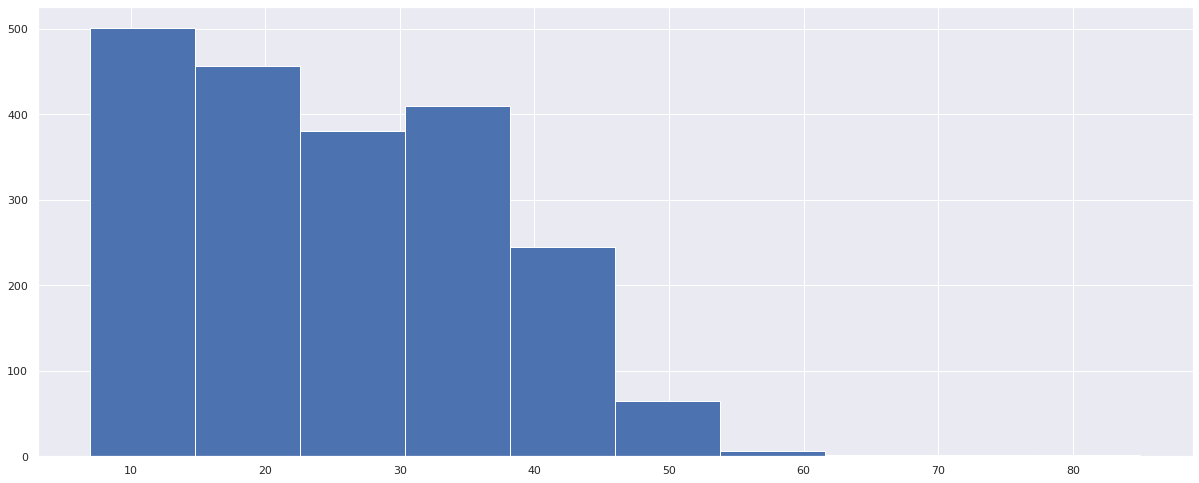

In [ ]:
df_val_processed['len']= df_val_processed['tweet'].str.split().map(lambda x: len(x))
df_val_processed.sort_values('len', ascending=False).reset_index(drop=True)

df_val_processed=df_val_processed[(df_val_processed.len>6) & (df_val_processed.len<=100)].reset_index(drop=True)
print('Max length: {}, Min length: {}, Average Length :{}'.format(max(df_val_processed['len']),min(df_val_processed['len']),int(df_val_processed['len'].mean())))
df_val_processed['len'].hist()

In [ ]:
# Saving into files

df_train_processed.to_csv(os.path.join(proc_data_loc,pr_train_name),columns=[feature_col, target_col])
df_test_processed.to_csv(os.path.join(proc_data_loc,pr_test_name),columns=[feature_col,target_col])
df_val_processed.to_csv(os.path.join(proc_data_loc,pr_val_name),columns=[feature_col, target_col])


# Reading Processd data

In [ ]:
# agan reading the processed dataset
df_tr= pd.read_csv(os.path.join(proc_data_loc,pr_train_name),usecols=[feature_col,target_col])
df_te=pd.read_csv(os.path.join(proc_data_loc,pr_test_name),usecols=[feature_col,target_col])
df_val=pd.read_csv(os.path.join(proc_data_loc,pr_val_name),usecols=[feature_col,target_col])

#dropping the row with na
df_tr= df_tr.drop_duplicates().dropna(axis=0).reset_index(drop=True)
df_te=df_te.drop_duplicates().dropna(axis=0).reset_index(drop=True)
df_val= df_val.drop_duplicates().dropna(axis=0).reset_index(drop=True)

len(df_tr['tweet']),len(df_val['tweet']),len(df_te['tweet'])

(6233, 2094, 2091)

# Data Analysis

# Label distribution


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



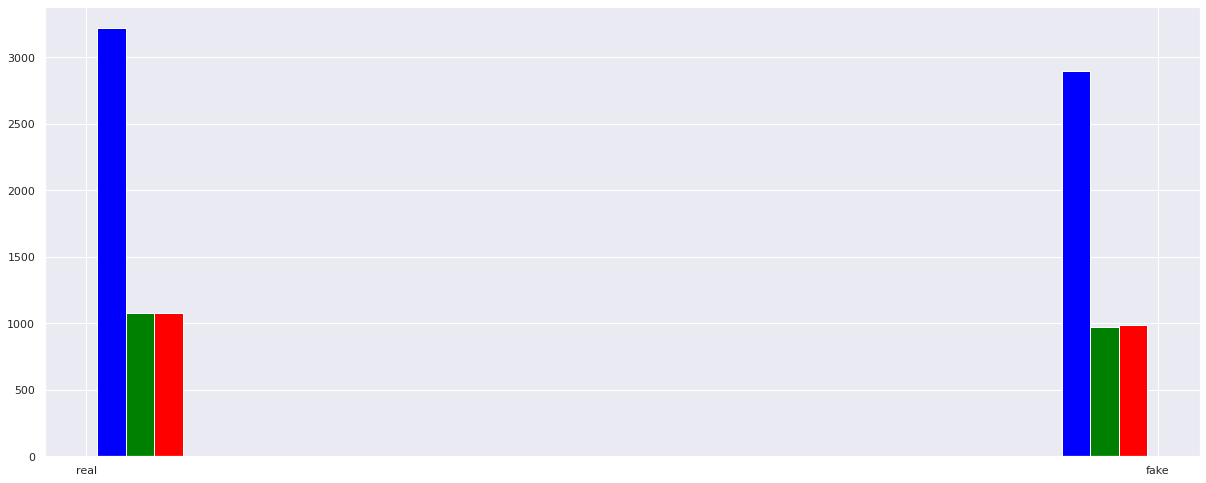

In [ ]:
plt.hist([df_tr['label'],df_te['label'],df_val['label']],color=['blue','green','red'])

plt.show()

## Word frequencies 

### word level exploration

In [ ]:
df_tr

,tweet,label,len
0,the cdc currently report death in general the ...,real,27
1,state reported death a small rise from last tu...,real,15
2,politically correct woman almost u pandemic a ...,fake,15
3,indiafightscorona we have covid testing labora...,real,22
4,populous state can generate large case count b...,real,40
...,...,...,...
6108,data from covidnet show that after a period of...,real,40
6109,a tiger tested positive for covid please stay ...,fake,14
6110,_a post claim a covid vaccine ha already been ...,fake,16
6111,aamir khan donate cr in pm relief care fund,fake,9


In [ ]:

def word_exploration(df,feature_col):
    # creating text corpus
    text= ' '.join(t for t in df[feature_col])
    words_list= text.split()
    word_freq= {}
    for word in set(words_list):
        word_freq[word]= words_list.count(word)

    df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])
    df_word['word_len']= df_word['word'].map(lambda x: len(x))
    df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
    
    # print(f'Top 10 most frequent words are:\n{df_word.head(10)}')
    sns.set(rc={'figure.figsize':(20.7,8.27)})
    df_top= df_word.head(50)
    fig, axs = plt.subplots(ncols=2)
    # plt.title('Top words')
    sns.barplot(x=df_top['count'],y=df_top['word'],orient='h',ax=axs[0]).set(title='Most Frequent word')
    
    # print('Word Distribution\n')
    sns.histplot(data=df_word,x='word_len',ax=axs[1]).set(title='Word length Distribution')
    # df_word['word_len'].hist()

    print(f'Max length words are \n{df_word[df_word.word_len==max(df_word.word_len)]}\n')
    return df_word,text





Max length words are 
                                    word  count  word_len
5024  wuhaninstituteofvirologylaboratory      2        34



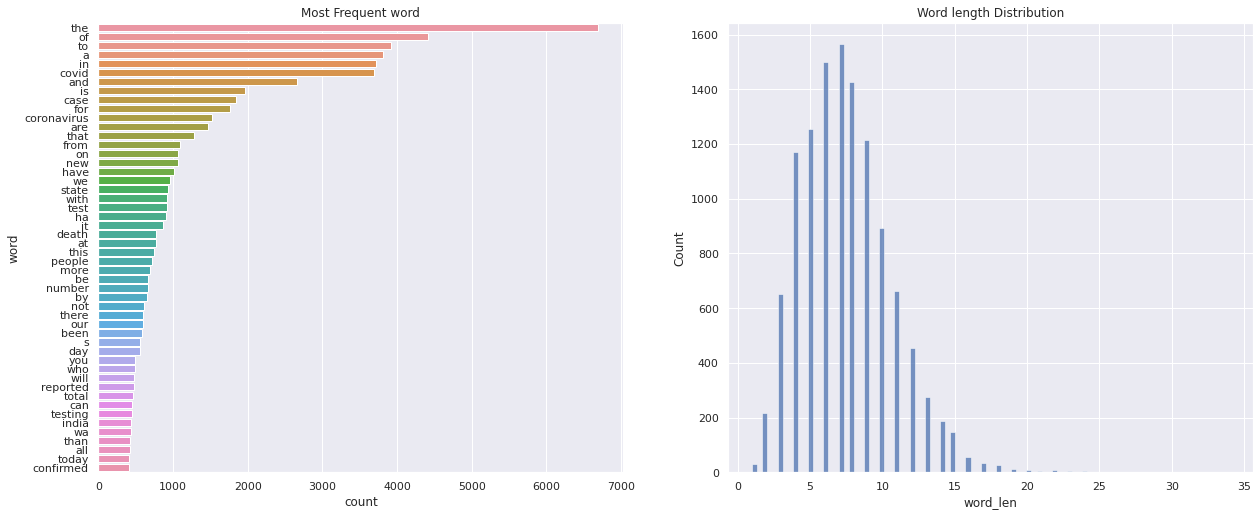

In [ ]:
# Training data
df_word_tr,_=word_exploration(df_tr,'tweet')

Max length words are 
                           word  count  word_len
5293  postpone_ca_exam_till_nov      1        25



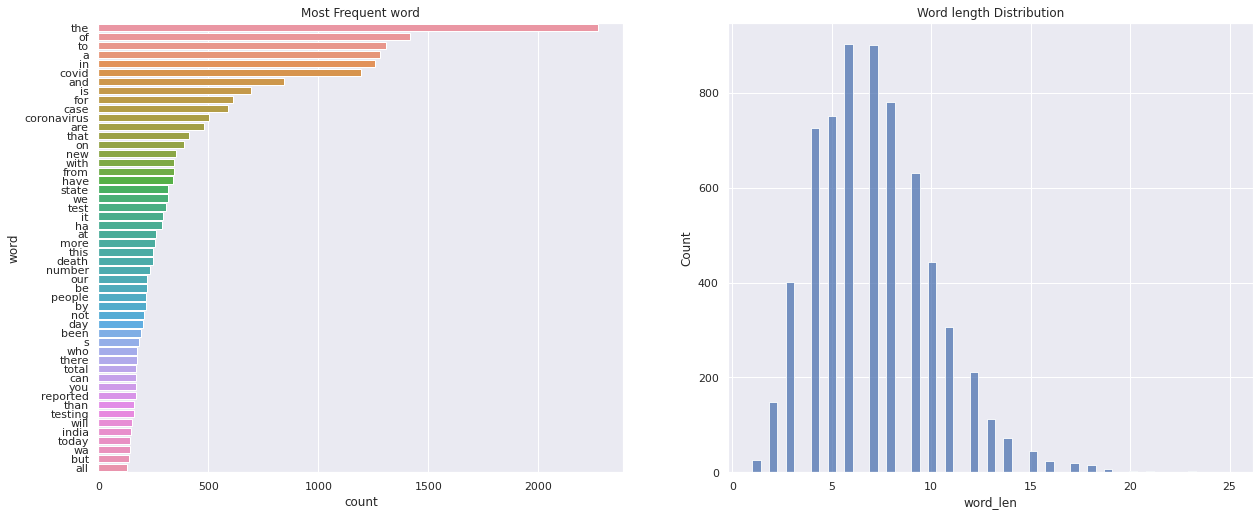

In [ ]:
# Validation data
df_word_val,_=word_exploration(df_val,'tweet')

Max length words are 
                                         word  count  word_len
3343  badalkarapnavyavaharkareincoronaparvaar      1        39



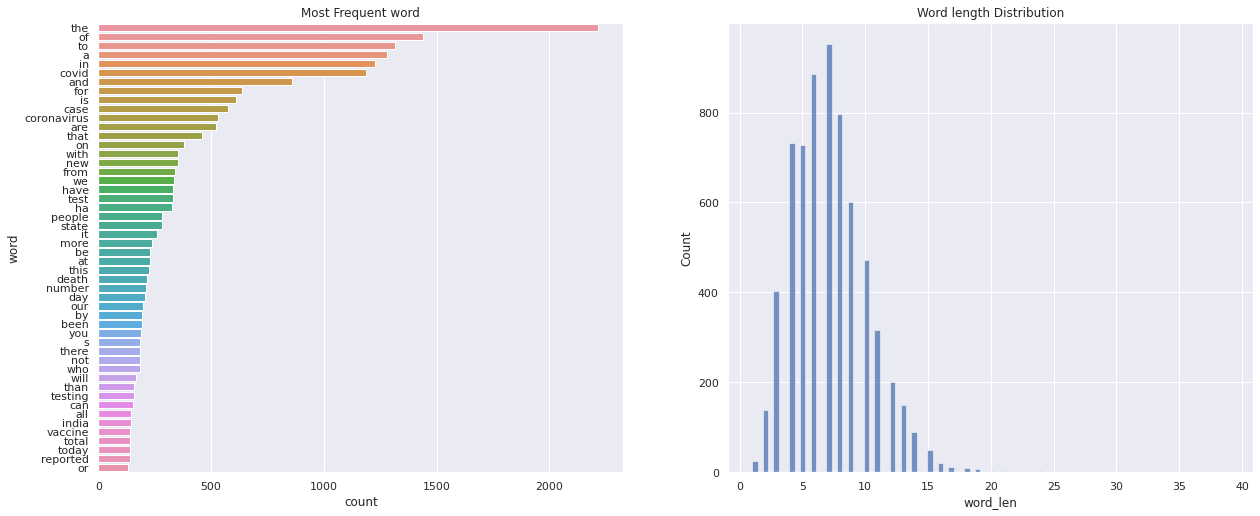

In [ ]:
# test data set
df_word_te,_=word_exploration(df_te,'tweet')

# Word Cloud

In [ ]:
# Generate a word cloud image
def generate_wordcloud(df,feature_col):
        plt.figure(figsize=(8, 6), dpi=80)
        text= ' '.join(w for w in df[feature_col])
        wordcloud = WordCloud(background_color='white',
                max_words=100,
                max_font_size=40,
                scale=3,
                random_state=1).generate(text)
        plt.axis("off")
        plt.imshow(wordcloud)


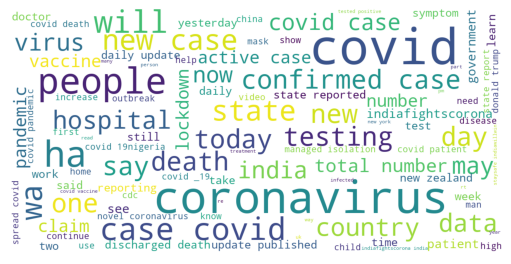

In [ ]:
# train dataset
generate_wordcloud(df_tr,'tweet')

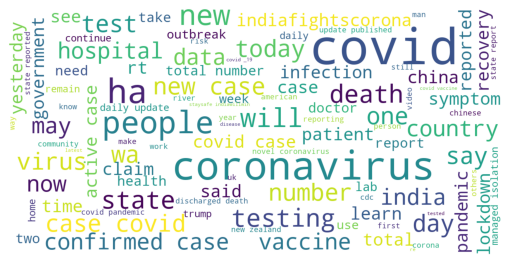

In [ ]:
#test dataset
generate_wordcloud(df_te,'tweet')

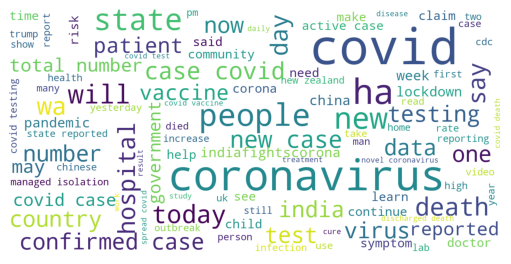

In [ ]:
# validation dataset
generate_wordcloud(df_val,'tweet')

# Class specific word cloud


In [ ]:
import time
def generate_wordcloud_perclass(df,feature_col,label_col):
    #finding number of label
    uni_label= df[label_col].unique()
    for label in uni_label:
        
        df_temp=df[df[label_col]==label]
        _,text=word_exploration(df_temp,'tweet')
        fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
        plt.plot()
        wordcloud = WordCloud(background_color='white',
                max_words=100,
                max_font_size=40,
                scale=3,
                random_state=1).generate(text)
        plt.imshow(wordcloud,interpolation="bilinear")
        plt.axis("off")
        fig.suptitle(label)
        plt.show()


Max length words are 
                                word  count  word_len
2341  tracingappfeedbackhealthgovtnz      3        30



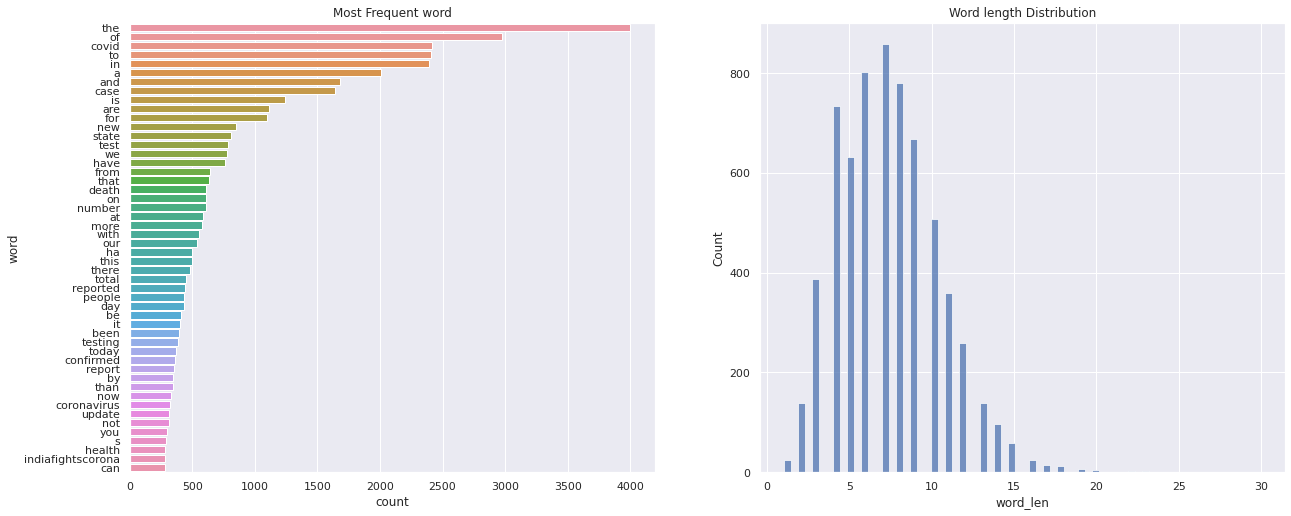

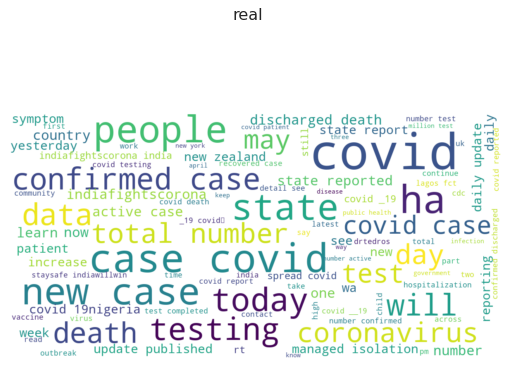

Max length words are 
                                    word  count  word_len
3361  wuhaninstituteofvirologylaboratory      2        34



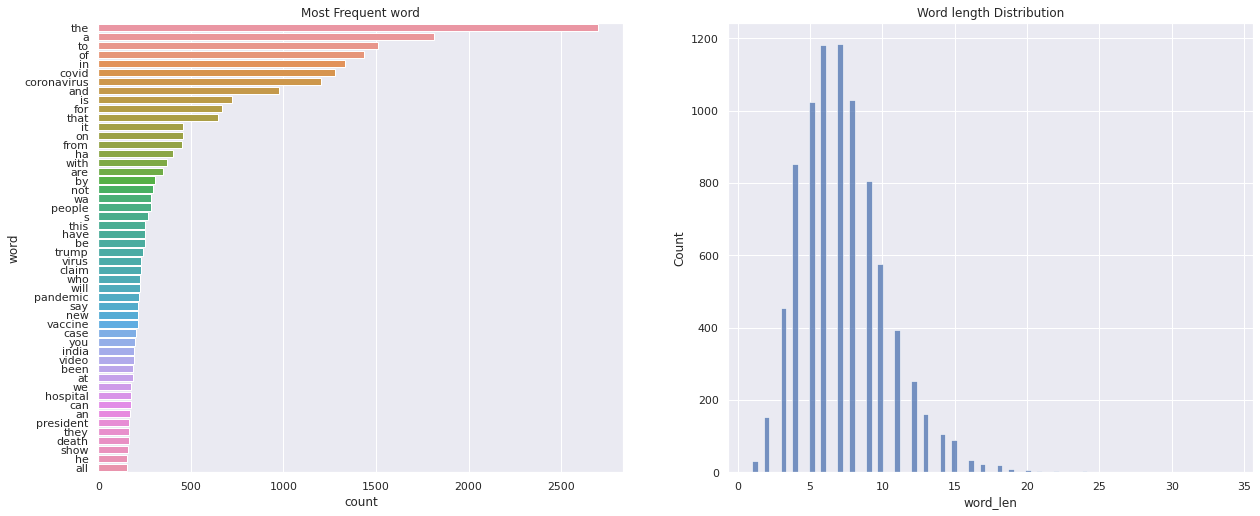

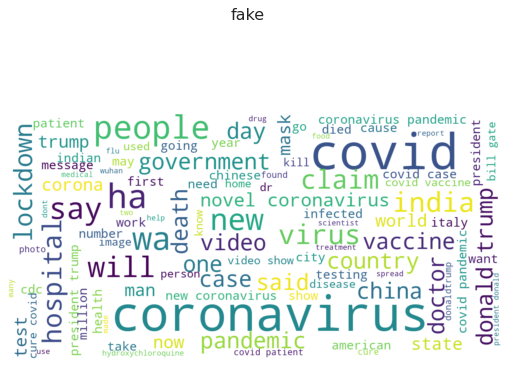

In [ ]:
generate_wordcloud_perclass(df_tr,feature_col='tweet' ,label_col='label')